In [1]:
import numpy as np
#from numpy import linalg 
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse import linalg
from scipy.special import hankel1

In [2]:
#integral
def I(a, b, xm, N):
    H = (b - a) / N
    X = np.zeros((N, 1))
    F = np.zeros((N, 1), dtype = np.complex)
    sum = 0
    for i in range(N):
        X[i] = (H / 2) + i * H + a      
        F[i] =  hankel1(0, np.abs(xm - X[i]))
        sum += F[i]
    return sum * H

#integral
def Dop(a, b, xm, N):
    H = (b - a) / N
    X = np.zeros((N, 1))
    F = np.zeros((N, 1), dtype = np.complex)
    sum = 0
    for i in range(N):
        X[i] = (H / 2) + i * H + a      
        F[i] =  hankel1(0, np.abs(xm - X[i])) - (- 2.j / np.pi) * np.log(1 / np.abs(xm - X[i])) 
        sum += F[i]
    return sum * H

#special integral I
def Int(u, v, i, N):
    h = u/N
    halfH = h/2
    z = np.zeros((N, 1))
    F = np.zeros((N, 1), dtype = np.complex)
    for j in range(N):
        z[j] = halfH + j * h
           
    #middle
    def Func(x): 
        return (- 2.j / np.pi) * (np.log(x) * np.power(x, i - 1)) / (np.sqrt(4 * np.pi * np.pi + 0.j - (x + v)*(x + v)))
    for j in range(N):
        res = Func(z[j])
        F[j] = res
    
    sum = 0
    for j in range(N):
        sum += F[j]
    
    interior = h * sum
    return interior 

#beta
def beta(xm, h, N):
    if xm >= 0 and xm <= h:
        return - Int(xm, -xm, 1, N) + (1 / h) * Int(xm, -xm, 2, N) - Int(h, xm, 1, N) + (1 / h) * Int(h, xm, 2, N)
    elif xm >= h and xm <= 2 * np.pi - h:
        return - Int(h, -xm, 1, N) + (1 / h) * Int(h, -xm, 2, N) - Int(h, xm, 1, N) + (1 / h) * Int(h, xm, 2, N)
    elif xm >= 2 * np.pi - h and xm <= 2 * np.pi:
        return - Int(h, -xm, 1, N) + (1/h) * Int(h, -xm, 2, N) - Int(2 * np.pi - xm, xm, 1, N) + (1 / h) * Int(2 * np.pi - xm, xm, 2, N)
    else:
        print("error")
        return 0

In [3]:
def Processing(N):
    h = 2 * np.pi / N

    XM = np.zeros((N, 1))
    for i in range(N):
        XM[i] = 0 + (h / 2) + i * h

    SN = np.zeros((N + 1, 1))
    for j in range(N + 1):
        SN[j] = 0 + j * h
    
    mat = np.zeros((N, N), dtype = np.complex)
    for m in range(N):
        for n in range(N):
            if n == m:
                mat[m, n] = beta(XM[m], h, N) * np.sqrt(4 * np.pi * np.pi - XM[m] * XM[m]) + Dop(SN[n], SN[n + 1], XM[m], N)  + 0 #LEGIT         
            else:
                mat[m, n] = I(SN[n], SN[n + 1], XM[m], N) 
                
    for n in range(N):
        mat[n, 0] = (2 / (np.pi * 1.j)) * np.exp(1.j * XM[n])
        
    for n in range(N):
        mat[n, N-1] = (2 / (np.pi * 1.j)) * np.exp(-1.j * XM[n])

    # theta = 90    
        
    right1 = np.zeros((N, 1), dtype = np.complex)
    for i in range(N):
        right1[i] = (2 / (np.pi * 1.j)) * 1.j #* ((1 - np.exp(1.j * XM[i])) - (1 - np.exp(1.j * 2 * np.pi)) * (np.sin(XM[i]) / np.sin(2 * np.pi)))  #theta = 90
            
    #answer1 = linalg.solve(mat, right1)
    answer1, inf1 = sp.sparse.linalg.bicgstab(mat, right1)
    print(inf1)
    answer1[0] = (0 + answer1[1]) / 2
    answer1[N-1] = (0 + answer1[N-2]) / 2
    
    # theta = 45

    right2 = np.zeros((N, 1), dtype = np.complex)
    for i in range(N):
        right2[i] = (2 / (np.pi * 1.j)) * (1.j * np.exp(1.j * XM[i] * np.cos(np.pi / 4)) / np.sin(np.pi / 4)) #* ((np.exp(1.j * XM[i] * np.cos(np.pi / 4)) - np.exp(1.j * XM[i])) - (np.exp(1.j * 2 * np.pi * np.cos(np.pi / 4)) - np.exp(1.j * 2 * np.pi)) * (np.sin(XM[i]) / np.sin(2 * np.pi)))  #theta = 45
    
    #answer2 = linalg.solve(mat, right2)
    answer2, inf2 = sp.sparse.linalg.bicgstab(mat, right2)
    print(inf2)
    answer2[0] = (0 + answer2[1]) / 2
    answer2[N-1] = (0 + answer2[N-2]) / 2
    
    # theta = 15

    right3 = np.zeros((N, 1), dtype = np.complex)
    for i in range(N):
        right3[i] = (2 / (np.pi * 1.j)) * (1.j * np.exp(1.j * XM[i] * np.cos(np.pi / 12)) / np.sin(np.pi / 12)) # * ((np.exp(1.j * XM[i] * np.cos(np.pi / 12)) - np.exp(1.j * XM[i])) - ((np.exp(1.j * 2 * np.pi * np.cos(np.pi / 12)) - np.exp(1.j * 2 * np.pi)) * (np.sin(XM[i] / np.sin(2 * np.pi)))))  #theta = 15
    
    #answer3 = linalg.solve(mat, right3)
    answer3, inf3 = sp.sparse.linalg.bicgstab(mat, right3)
    print(inf3)
    answer3[0] = (0 + answer3[1]) / 2
    answer3[N-1] = (0 + answer3[N-2]) / 2
    
    return XM, SN, answer1, answer2, answer3, N

In [4]:
def DrawingFull(XM, answer1, answer2, answer3, N):
    plt.rcParams.update({'font.size': 18})
    plt.rcParams.update({'xtick.labelsize': 18})
    plt.rcParams.update({'ytick.labelsize': 18})
    plt.rcParams['figure.figsize'] = [8, 5] #12, 6

    #real
    res_real1 = np.real(answer1)
    plt.plot(XM, res_real1, 'bo', label = "θ = 90")

    res_real2 = np.real(answer2)
    plt.plot(XM, res_real2, 'bo', color = 'green', label = "θ = 45")

    res_real3 = np.real(answer3)
    plt.plot(XM, res_real3, 'bo', color = '#4b0082', label = "θ = 15")

    #plt.legend(bbox_to_anchor=(0.92, 0.90),
    #           bbox_transform=plt.gcf().transFigure)

    plt.xlabel("x")
    plt.ylabel("Re j(x)")

    plt.grid()
    plt.show()

    #imag
    res_imag1 = np.imag(answer1)
    plt.plot(XM, res_imag1, 'bo', label = "θ = 90")

    res_imag2 = np.imag(answer2)
    plt.plot(XM, res_imag2, 'bo', color = 'green', label = "θ = 45")

    res_imag3 = np.imag(answer3)
    plt.plot(XM, res_imag3, 'bo', color = '#4b0082', label = "θ = 15")

    plt.legend(bbox_to_anchor=(0.91, 0.90),
               bbox_transform=plt.gcf().transFigure)

    plt.xlabel("x")
    plt.ylabel("Im j(x)")

    plt.grid()
    plt.show()

In [5]:
res = Processing(100)

0
0
0


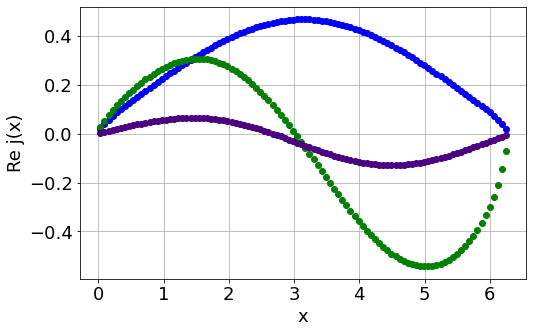

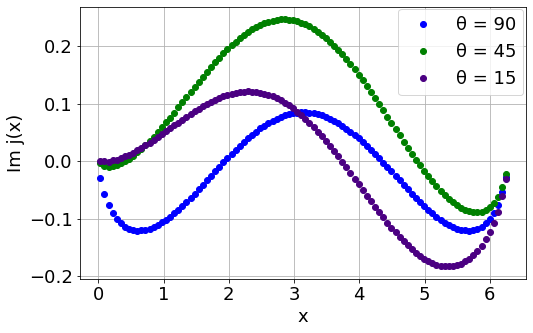

In [6]:
DrawingFull(res[0], res[2], res[3], res[4], res[5])